# PCA na mão e no Python

PCA, ou principal component analysis é uma técnica para reduzir a dimensão de um conjunto de dados preservando, de certa forma, suas propriedades.

Executar essa técnica na mão ou sem ajuda de funções prontas é um bom exercício para aprender a fundo o que está por trás desse processo.

Nesse tutorial faremos um exemplo de PCA na mão, sempre conferindo as contas com Python e depois faremos o mesmo exemplo usando a biblioteca Scikit-learn.

<div>
<img src="./images/pencil.jpg" width="300"/>
</div>

Foto por William Iven no Unsplash

## Pequeno exemplo de PCA para fazer na mão

Como utilizaremos o Python para conferir nossas contas, importaremos as bibliotecas necessárias.

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos as seguintes matrizes para esse trabalho:  
<center>  

$$ X = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 1 & 3 \\ 2 & 4 \\ 2 & 3 \\ 1 & 4 \end{bmatrix} $$  

&emsp; e &emsp; 

$$ y = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \\ 1 \\ 1 \end{bmatrix} $$  

</center>

A matriz **X**  representa as features, enquanto **y**  representa o target. Declararemos essas matrizes no Python:

In [2]:
# matrizes no Python
df = pd.DataFrame({
    'var1':[1,3,1,2,2,1],
    'var2':[2,4,3,4,3,4],
    'target': [0,1,0,1,1,1]
})
X = df.drop('target',1)
y = df['target']

Precisaremos das médias de cada coluna de **X**. Para o cálculo da média da coluna **j** basta fazer a seguinte conta:

$$\frac{\sum \limits _{i=1} ^{N} X_{ij}}{n}$$

com **n** sendo o número de linhas da matriz **X**. Podemos conferir as contas no Python usando a biblioteca numpy:

In [3]:
# média por coluna de X
mean_vec = np.mean(X, axis=0) ## axis=0 --> coluna
print(mean_vec)

var1    1.666667
var2    3.333333
dtype: float64


Nossa própria tarefa é determinar a matriz de covariância.

Para isso, vamos usar uma matriz **M** auxiliar.

Para determinar **M** subtraia a média da coluna **i** da coluna respectiva. 

Como no nosso exemplo todas as entradas de **M** estão multiplicadas por $\frac{1}{3}$ , para ficar mais elegante, colocamos $\frac{1}{3}$ em evidência.

$$
M = \Large\frac{1}{3}\normalsize\begin{bmatrix} -2 & -4 \\ 4 & 2 \\ -2 & -1 \\ 1 & 2 \\ 1 & -1 \\ -2 & 2 \end{bmatrix}
$$

Para realizar a mesma conta no Python, use o código a seguir:

In [4]:
# subtraindo a média da respectiva coluna de X
M = X - mean_vec

A matriz de covariância é de  X  é dada por:
$$
C=\frac{1}{n−1}M^{T}M
$$ 
onde  n  é o número de linhas de  X.

Logo, $C=\Large\frac{1}{3}\normalsize\begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$
 
No Python:

In [5]:
# calculando matriz de covariância
C = M.T.dot(M) / (X.shape[0]-1)

In [6]:
# imprimindo C
C

,var1,var2
var1,0.666667,0.333333
var2,0.333333,0.666667


Próximo passo é determinar auto-valores e auto-vetores da matriz de covariância C. Os auto-valores $\lambda$ de C são raizes de
$pC(x)=det(C−xI)$
 
onde I é a matriz identidade.

Cada auto-valor $\lambda$ tem auto-vetores associados. Apesar de auto-vetores nunca serem nulos, se incluírmos o vetor nulo no conjunto dos auto-vetores associados e chamarmos esse novo conjunto de $V_\lambda$, temos que $V_\lambda$ é o conjunto solução do seguinte sistema :$(C−\lambda I)X=0$
 
Tomaremos geradores unitários de $V\lambda 1$ e de $V\lambda 2$, para $\lambda 1=1$ e $\lambda 2= \frac{1}{3}$, a saber, tomaremos os seguintes auto-vetores:

$$
\left\{ \Bigg( \frac{ \sqrt{2}}{2},− \frac{ \sqrt{2}}{2}\Bigg),\Bigg( \frac{ \sqrt{2}}{2}, \frac{ \sqrt{2}}{2}\Bigg) \right\}
$$

Essa escolha não é única e isso pode dar pequenas diferenças nos resultados finais.

No Python:

In [7]:
# determinando auto-valores e auto-vetores
autovalores, autovetores = np.linalg.eig(C)

# imprimindo auto-valores de C
print("Auto-valores:")
print(autovalores)
print()

# imprimindo autovetores
print("Auto-vetores:")
print(autovetores)

Auto-valores:
[1.         0.33333333]

Auto-vetores:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Agora, ordenaremos os auto-valores do maior para o menor. Assim $\lambda 1=1$ e $\lambda 2 =\frac{1}{3}$.
 
No Python:

In [8]:
# ordenando em ordem descrecente
pares_de_autos = [
    (
        np.abs(autovalores[i]),
        autovetores[:,i]
    ) for i in range(len(autovalores))
]
pares_de_autos.sort()
pares_de_autos.reverse()

Nosso próximo passo é calcular o quanto cada componente (auto-vetores) estão representando (de certa forma) a variabilidade dos nossos dados. Para isso usaremos duas medidas.

A variância explicada de cada auto-valor $\lambda$ é dada por:
$$
\large\frac{\lambda}{\sum _{j} \lambda_{j}}
$$
 
A variância explicada acumulada de cada auto-valor $\lambda _{i}$  é dada por:
$$
\frac{\sum _{j \leq i} \lambda _{j}} {\sum _{j} \lambda_{j}}
$$

No Python:

In [9]:
# calculando a variância explicada e a variância explicada cumulativa
total = sum(autovalores)
var_exp = [
    (i / total)*100 for i in sorted(
        autovalores, reverse=True
    )
]
cum_var_exp = np.cumsum(var_exp)


Vejamos a forma sumarizada até o momento:


In [10]:
# visualizando as informações
x = [
    'PC %s' %i for i in range(
        1,len(autovalores)+1
    )
]
df_temp = pd.DataFrame(
    {'auto-valores': autovalores,
     'cum_var_exp':cum_var_exp,
     'var_exp':var_exp,
     'Componente':x}
)
print(df_temp)
print()
print("Auto-vetores")
for autovetor in [p[1] for p in pares_de_autos]:
    print(autovetor)
print()

   auto-valores  cum_var_exp  var_exp Componente
0      1.000000         75.0     75.0       PC 1
1      0.333333        100.0     25.0       PC 2

Auto-vetores
[0.70710678 0.70710678]
[-0.70710678  0.70710678]



Bom, isso é tudo!

Considerando os dados originais como pares ordenados em $\mathbb{R}^{2}$ , pois  $X$  possui apenas duas colunas, ao mudar da base canônica para a base composta pelos auto-vetores encontrados, teremos uma nova representação do conjunto $X$.

Vejamos graficamente:

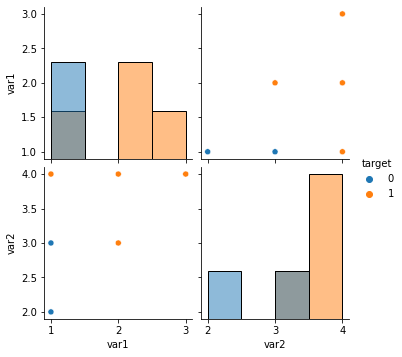

In [11]:
# visualizando graficamente os dados originais
sns.pairplot(
    df,
    vars = ['var1','var2'],
    hue='target',
    diag_kind="hist"
)
plt.show()

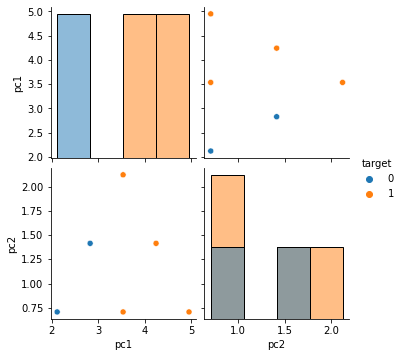

In [12]:
# visualizando graficamente os dados através da mudança de base
# considerando base de auto-vetores
n_componentes = 2 # projetamos nas 2 (duas) primeiras componentes
autovetores = [p[1] for p in pares_de_autos]
A = autovetores[0:n_componentes] 
X = np.dot(X,np.array(A).T)
new_df = pd.DataFrame(X,columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'], hue='target', diag_kind="hist"
)
plt.show()

* Os dados originais foram rotacionados por um ângulo de 45º uma vez que os auto-vetores são perpendiculares e obtidos dos eixos x e y por uma rotação de 45º no sentido anti-horário.

* Nossos dados possuiam 2 colunas, mas poderiam possuir bem mais. Além disso escolhermos 2 componentes para visualização gráfica, esse número também pode ser mais, desde que seja menor que o número de colunas.

* A ideia do PCA é diminuir a dimensão do conjunto de dados original escolhendo um número menor de componentes para projeção sobre estas.

* O processo de redução de dimensão facilita processamento e armazenamento de dados.
---


## Fazendo uso da biblioteca

Agora, vejamos o mesmo exemplo utilizando a Scikit-learn.

In [13]:
# biblioteca
from sklearn.decomposition import PCA

# dados
df = pd.DataFrame({
    'var1':[1,3,1,2,2,1],
    'var2':[2,4,3,4,3,4],
    'target': [0,1,0,1,1,1]
})
X = df.drop('target',1)
y = df['target']

# pca
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Isso é tudo, agora vejamos as informações para fins de comparação.

In [14]:
print("Auto-valores:")
print(pca.explained_variance_)
print()

print("Auto-vetores:")
print(pca.components_)
print()

print("Variância explicada:")
print(pca.explained_variance_ratio_)
print()

Auto-valores:
[1.         0.33333333]

Auto-vetores:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Variância explicada:
[0.75 0.25]



Observe que, como a escolha dos auto-vetores não é única, o algoritmo implementado na biblioteca Scikit-learn escolheu auto-vetores diferentes dos nossos. 

Mas, isso não é problema, pois só houve inversão de sinal. 

Logo, quando fizermos a visualização gráfica da mudança de coordenada, haverá uma inversão da figura. 

Vejamos:


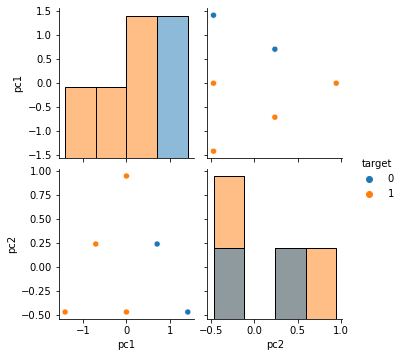

In [15]:
# Tranformando X
X = pca.transform(X)

# Visualizando
new_df = pd.DataFrame(X, columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'], hue='target', diag_kind="hist")
plt.show()

Perfeito!
Mas essa técnica serve para reduzir dimensões. 
Como nosso exemplo é apenas para fins educacionais, é hora de aprender com exemplos reais como usar o poderoso PCA!

---

## PCA no conjunto de dados Iris
No próximo exemplo utilizaremos PCA para reduzir o conjunto de dados Iris de 4 para 2 features. 

O conjunto pode ser baixado no repositório UCI. 

O link encontra-se nas referências.

In [16]:
# dados
df = pd.read_csv('./data/iris.data',header=None)
df.columns = [
    'sepal length in cm',
    'sepal width in cm',
    'petal length in cm',
    'petal width in cm',
    'target'
]
X = df.drop('target',1)
y = df['target']


Faremos novamente passo a passo. O código é análogo ao código usado no exemplo anterior.


In [17]:
mean_vec = np.mean(X, axis=0)
M = X - mean_vec
C = M.T.dot(M) / (X.shape[0]-1)
autovalores, autovetores = np.linalg.eig(C)
pares_de_autos = [
    (
        np.abs(autovalores[i]),
        autovetores[:,i]
    ) for i in range(len(autovalores))
]
pares_de_autos.sort()
pares_de_autos.reverse()
total = sum(autovalores)
var_exp = [
    (i / total)*100 for i in sorted(autovalores, reverse=True)
]
cum_var_exp = np.cumsum(var_exp)

In [18]:
x = ['PC %s' %i for i in range(1,len(autovalores)+1)]
df_temp = pd.DataFrame(
    {'auto-valores': autovalores,
     'cum_var_exp':cum_var_exp,
     'var_exp':var_exp,
     'Componente':x}
)
print(df_temp)
print()
print("Auto-vetores")
for autovetor in [p[1] for p in pares_de_autos]:
    print(autovetor)
print()

   auto-valores  cum_var_exp    var_exp Componente
0      4.224841    92.461621  92.461621       PC 1
1      0.242244    97.763178   5.301557       PC 2
2      0.078524    99.481691   1.718514       PC 3
3      0.023683   100.000000   0.518309       PC 4

Auto-vetores
[ 0.36158968 -0.08226889  0.85657211  0.35884393]
[-0.65653988 -0.72971237  0.1757674   0.07470647]
[-0.58099728  0.59641809  0.07252408  0.54906091]
[ 0.31725455 -0.32409435 -0.47971899  0.75112056]




Com duas componentes temos uma variância explicada cumulativa de 97%. Utilizaremos então, apenas duas componentes.


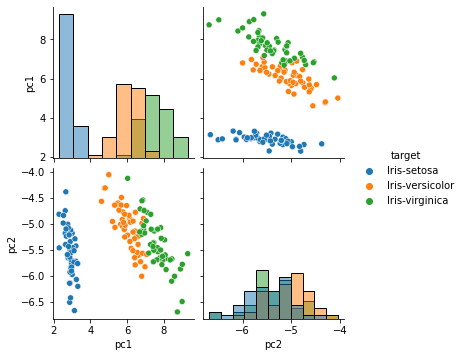

In [19]:
n_componentes = 2 # projetamos nas 2 (duas) primeiras componentes
autovetores = [p[1] for p in pares_de_autos]
A = autovetores[0:n_componentes] 
X = np.dot(X,np.array(A).T)
new_df = pd.DataFrame(X, columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'],
    hue='target', diag_kind="hist")
plt.show()

Experimente trabalhar com outros conjuntos de dados com um maior número de features.

Vejamos agora o mesmo exemplo utilizando a biblioteca Scikit-learn.

---

## PCA no conjunto de dados Iris com biblioteca

Novamente, carregamos o conjunto de dados.


In [20]:
# dados
df = pd.read_csv('./data/iris.data',header=None)
df.columns = [
    'sepal length in cm',
    'sepal width in cm',
    'petal length in cm',
    'petal width in cm',
    'target'
]
X = df.drop('target',1)
y = df['target']

Repetimos então o processo, só que, desta vez, utilizando o PCA já pronto.

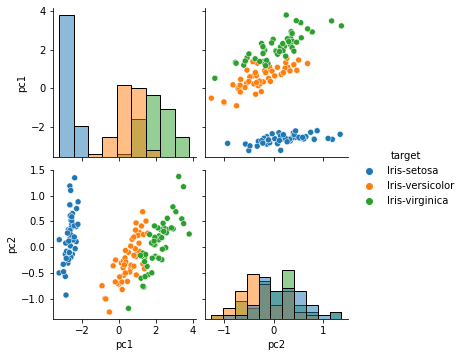

In [21]:
pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
new_df = pd.DataFrame(X, columns=['pc1','pc2'])
new_df['target'] = df['target']
sns.pairplot(
    new_df, vars = ['pc1','pc2'],
    hue='target', diag_kind="hist")
plt.show()

A seguir, veremos outra aplicação.

---

## PCA para redução de dimensão em imagens

Outra aplicação é a redução de dimensão em imagens.

Para esse exemplo, escolhemos a imagem Pássaro Mineiro Barulhento retirada do site Pixabay.

A imagem foi transformada em escala de cinza utilizando o software GIMP.

<div>
<img src="attachment:bird.jpg" width="200"/>
</div>

Primeiro, carregaremos a imagem.

In [22]:
# carregando a imagem e visualizando dimensões
X = plt.imread('./images/bird.jpg')
X.shape

(1920, 1899)

Observe que a matriz tem 1920 linhas e 1899 colunas. Aplicaremos, em seguida, a técnica PCA.

In [23]:
# aplicando PCA
pca = PCA(0.99) # variância explicada de 0.99
lower_dimension_data = pca.fit_transform(X)
lower_dimension_data.shape

(1920, 145)

O número 0.99 passado como parâmetro para o métodos PCA diz que queremos um número de componentes que nos garanta 99% de variância explicada cumulativa. 

Observe que para isso, utilizou-se 145 componentes. Isso é uma redução imensa, uma vez que a original possuia 1899 colunas. 

Queremos ver, caso necessário recuperar a imagem, como essas imagens ficam com a dimensão reduzida. 

Para isso serão necessários duas funções auxiliares.

In [24]:
def pca_with_var_exp(X, var_exp=0.99):
    pca = PCA(var_exp) # variância explicada de 0.99
    lower_dimension_data = pca.fit_transform(X)
    print(lower_dimension_data.shape)
    approximation = pca.inverse_transform(lower_dimension_data)
    return approximation

def plot_subplot(X, i):
    plt.subplot(3,2,i)
    plt.imshow(X, cmap="gray")
    plt.xticks([])
    plt.yticks([])

A primeira função reduz a imagem X mantendo var_exp de variância explicada cumulativa. Compararemos 3 valores: 0.99, 0.95 e 0.90.

In [25]:
# calculando algumas aproximações
img_1 = pca_with_var_exp(X, var_exp=0.99)
img_2 = pca_with_var_exp(X, var_exp=0.95)
img_3 = pca_with_var_exp(X, var_exp=0.90)

(1920, 145)
(1920, 31)
(1920, 14)


A segunda função mostra o gráfico. Utilizaremos ela para comparar as imagens obtidas com a original.

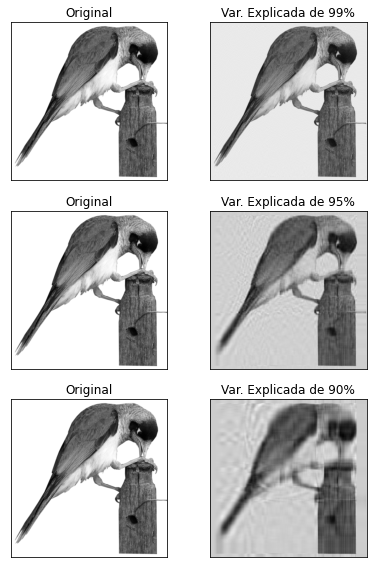

In [26]:
# visualizando aproximações
plt.figure(figsize=(6,8))

plot_subplot(X, 1)
plt.title("Original")
plot_subplot(img_1, 2)
plt.title("Var. Explicada de 99%")
plot_subplot(X, 3)
plt.title("Original")
plot_subplot(img_2, 4)
plt.title("Var. Explicada de 95%")
plot_subplot(X, 5)
plt.title("Original")
plot_subplot(img_3, 6)
plt.title("Var. Explicada de 90%")

plt.tight_layout()
plt.show()

Referências:

[Artigo original em inglês](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

[Imagem original do pássaro mineiro barulhento](https://pixabay.com/pt/photos/p%C3%A1ssaro-mineiro-barulhento-4580638/)

[Arquivo CSV do dataset IRIS](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/)

